# COVID19DB PROJECT (www.covid19db.org): covid19 - Administrative division


This notebook demonstrates how to access Administrative division data.

# Administrative division, level 0 - List of countries

Data source for adm level 0:
https://www.naturalearthdata.com/downloads/50m-cultural-vectors/

Data source for adm level 1:
https://www.naturalearthdata.com/downloads/10m-cultural-vectors/


In [389]:
import psycopg2
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Connect to covid19db.org
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19'
)

cur = conn.cursor()


In [390]:
import geopandas as gpd
def get_administrative_division_level_0():
    sql = """SELECT * FROM administrative_division WHERE adm_level=0 """

    admin_0_data = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geometry')
    admin_0_data["area"] = admin_0_data['geometry'].area
    admin_0_data['gdpr'] = admin_0_data['properties'].apply(lambda x: x['GDP_MD_EST'])
    return admin_0_data

In [391]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import geoplot as gplt

def choropleth_administrative_division(data, hue, add_text=False):
    schema = mc.Quantiles(data[hue], k=10)
    gplt.choropleth(
        data,     
        hue=hue,     
        edgecolor='white', 
        linewidth=1,
        cmap='Blues',
        scheme=schema,
        legend=True, 
        legend_kwargs={'bbox_to_anchor': (1, 0.9), 'frameon': False},
    )
    if add_text:
        for _, row in data.iterrows():
          plt.text(s=row['adm_area_1'], x = row['longitude'], y = row['latitude'],
                   horizontalalignment='center', 
                   fontdict = {'weight': 'bold', 'size': 10, 'family': 'serif', 'color':  'maroon',})
        
        
def plot_administrative_division(data, cmap='Blues', add_text=False):
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    fig, ax = plt.subplots(figsize = (10,6))
    data.reset_index().plot(column = 'region', cmap=cmap, ax=ax)
    ax.set_axis_off()
    plt.axis('equal');
    
    if add_text:
        for _, row in data.iterrows():
          c = row['geometry'].centroid
          plt.text(s=row.name, x = c.x, y = c.y,
                   horizontalalignment='center', 
                   fontdict = {'weight': 'bold', 'size': 10, 'family': 'serif', 'color':  'maroon',})

In [392]:
admin_0_data = get_administrative_division_level_0()

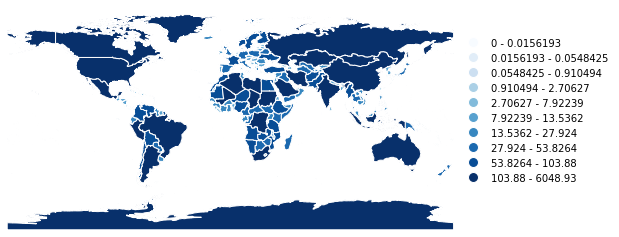

In [393]:
choropleth_administrative_division(admin_0_data, 'area', add_text=False)

# Administrative division, level 1

In [394]:
import geopandas as gpd
def get_administrative_division_level_1(countrycode):
    sql = """SELECT * FROM administrative_division WHERE adm_level=1 AND countrycode='%s'""" % (countrycode)

    admin_1_data = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geometry')
    admin_1_data["area"] = admin_1_data['geometry'].area
    return admin_1_data

### Administrative division, level 1 - Poland

In [395]:
POL_admin_1_data = get_administrative_division_level_1('POL')
POL_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,latitude,longitude,properties,geometry,area
0,Poland,POL,PL,1,Silesian,PL.SL,None,None,None,None,50.309645,18.995798,"{'fips': 'PL83', 'name': 'Silesian', 'note': '...","POLYGON ((19.44887 49.60036, 19.44339 49.60178...",1.545867
1,Poland,POL,PL,1,Lesser Poland,PL.MA,None,None,None,None,49.839725,20.307995,"{'fips': 'PL77', 'name': 'Lesser Poland', 'not...","POLYGON ((19.70632 49.38753, 19.68451 49.38908...",1.951844
2,Poland,POL,PL,1,Subcarpathian,PL.PK,None,None,None,None,49.969645,22.208309,"{'fips': 'PL80', 'name': 'Subcarpathian', 'not...","POLYGON ((21.66630 49.40179, 21.65876 49.40246...",2.256870
3,Poland,POL,PL,1,Lower Silesian,PL.DS,None,None,None,None,51.075002,16.373136,"{'fips': 'PL72', 'name': 'Lower Silesian', 'no...","POLYGON ((15.10795 50.98102, 15.09389 50.98542...",2.521383
4,Poland,POL,PL,1,Opole,PL.OP,None,None,None,None,50.616877,17.874809,"{'fips': 'PL79', 'name': 'Opole', 'note': '', ...","POLYGON ((16.95879 50.41460, 16.94400 50.42027...",1.168678


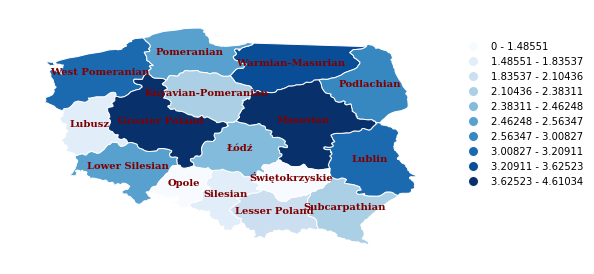

In [396]:
 choropleth_administrative_division(POL_admin_1_data, 'area', add_text=True)

### Administrative division, level 1 - USA

In [397]:
USA_admin_1_data = get_administrative_division_level_1('USA')
USA_admin_1_data.head()
# Remove Alaska and Hawai
USA_admin_1_data.drop(USA_admin_1_data[USA_admin_1_data.adm_area_1.isin(['Hawaii', 'Alaska'])].index, inplace=True)
USA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,latitude,longitude,properties,geometry,area
0,United States of America,USA,US,1,Illinois,US.IL,None,None,None,None,40.126566,-89.154353,"{'fips': 'US17', 'name': 'Illinois', 'note': '...","POLYGON ((-90.58530 38.87808, -90.62653 38.890...",15.869785
1,United States of America,USA,US,1,Minnesota,US.MN,None,None,None,None,46.343225,-94.199160,"{'fips': 'US27', 'name': 'Minnesota', 'note': ...","POLYGON ((-95.16057 49.36949, -95.10282 49.353...",26.277951
2,United States of America,USA,US,1,Washington,US.WA,None,None,None,None,47.380004,-120.436401,"{'fips': 'US53', 'name': 'Washington', 'note':...","MULTIPOLYGON (((-122.65326 48.99251, -122.4333...",20.740910
3,United States of America,USA,US,1,Idaho,US.ID,None,None,None,None,44.394309,-114.653456,"{'fips': 'US16', 'name': 'Idaho', 'note': '', ...","POLYGON ((-117.03815 48.99251, -116.93818 48.9...",24.437668
4,United States of America,USA,US,1,Montana,US.MT,None,None,None,None,47.031836,-109.637959,"{'fips': 'US30', 'name': 'Montana', 'note': ''...","POLYGON ((-116.04816 48.99251, -115.83913 48.9...",44.918917


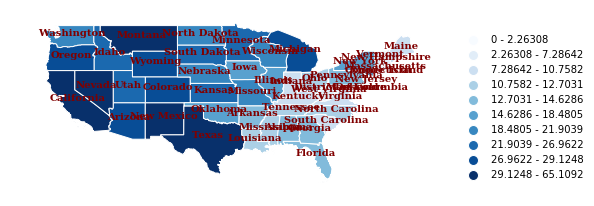

In [398]:
choropleth_administrative_division(USA_admin_1_data, 'area', add_text=True)

### Administrative division, level 1 - UK

In [399]:
GBR_admin_1_data = get_administrative_division_level_1('GBR')
GBR_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,1,East Dunbartonshire,GB.ED,None,None,None,None,55.950510,-4.208246,"{'fips': 'UKU5', 'name': 'East Dunbartonshire'...","POLYGON ((-4.14225 56.02857, -4.13868 56.02108...",0.027039
1,United Kingdom,GBR,GB,1,Glasgow,GB.GG,None,None,None,None,55.848707,-4.241386,"{'fips': 'UKV2', 'name': 'Glasgow', 'note': ''...","POLYGON ((-4.35578 55.86403, -4.35578 55.86871...",0.023106
2,United Kingdom,GBR,GB,1,Derry,GB.LD,None,None,None,None,54.945659,-7.214693,"{'fips': 'UK70', 'name': 'Derry', 'note': '', ...","POLYGON ((-7.41576 54.94437, -7.40866 54.95112...",0.053503
3,United Kingdom,GBR,GB,1,Strabane,GB.SB,None,None,None,None,54.759132,-7.430977,"{'fips': 'UK77', 'name': 'Strabane', 'note': '...","POLYGON ((-7.55615 54.73837, -7.54307 54.74167...",0.121022
4,United Kingdom,GBR,GB,1,Fermanagh,GB.FE,None,None,None,None,54.348704,-7.645654,"{'fips': 'UK66', 'name': 'Fermanagh', 'note': ...","POLYGON ((-7.88714 54.53212, -7.84884 54.54091...",0.260533


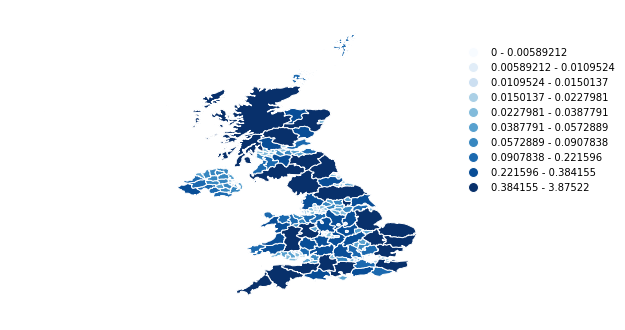

In [400]:
choropleth_administrative_division(GBR_admin_1_data, 'area', add_text=False)

### Administrative division, List of administrative regions - UK

In [402]:
GBR_regions = GBR_admin_1_data[['country', 'countrycode', 'properties', 'geometry']].reset_index()
GBR_regions['region'] = GBR_regions.properties.apply(lambda x: x['region'])
GBR_regions = GBR_regions.dissolve(by='region')
GBR_regions.head()

,geometry,index,country,countrycode,properties
region,,,,,
East,"POLYGON ((0.54717 51.51773, 0.52540 51.51691, ...",63,United Kingdom,GBR,"{'fips': 'UKI9', 'name': 'Norfolk', 'note': ''..."
East Midlands,"POLYGON ((-0.65450 52.19247, -0.72892 52.16162...",61,United Kingdom,GBR,"{'fips': 'UKH7', 'name': 'Lincolnshire', 'note..."
East Wales,"MULTIPOLYGON (((-4.09813 53.30964, -4.06892 53...",33,United Kingdom,GBR,"{'fips': 'UKY5', 'name': 'Neath Port Talbot', ..."
Eastern,"POLYGON ((-2.02286 55.80549, -2.06796 55.79587...",23,United Kingdom,GBR,"{'fips': 'UKT9', 'name': 'Scottish Borders', '..."
Greater London,"POLYGON ((0.22464 51.48900, 0.21886 51.48575, ...",9,United Kingdom,GBR,"{'fips': 'UK17', 'name': 'Wandsworth', 'note':..."


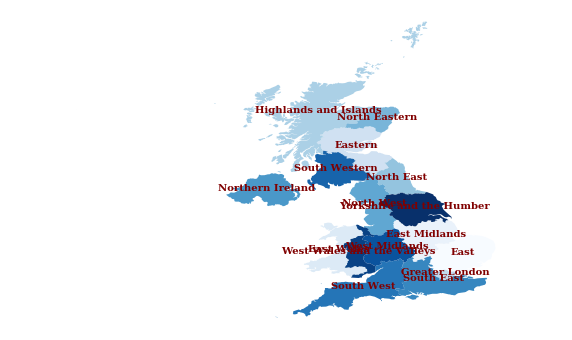

In [403]:
plot_administrative_division(GBR_regions, add_text=True)

### Administrative division, Parts of UK

In [404]:
GBR_geonunit = GBR_admin_1_data[['country', 'countrycode', 'properties', 'geometry']].reset_index()
GBR_geonunit['region'] = GBR_geonunit.properties.apply(lambda x: x['geonunit'])
GBR_geonunit = GBR_geonunit.dissolve(by='region', aggfunc='sum')
GBR_geonunit.head()

,geometry,index
region,,
England,"MULTIPOLYGON (((-6.29882 49.93549, -6.29223 49...",20493
Northern Ireland,"MULTIPOLYGON (((-6.61646 54.03727, -6.63062 54...",1629
Scotland,"MULTIPOLYGON (((-2.85029 55.11129, -2.87209 55...",2691
Wales,"MULTIPOLYGON (((-3.17272 51.45311, -3.16006 51...",1752


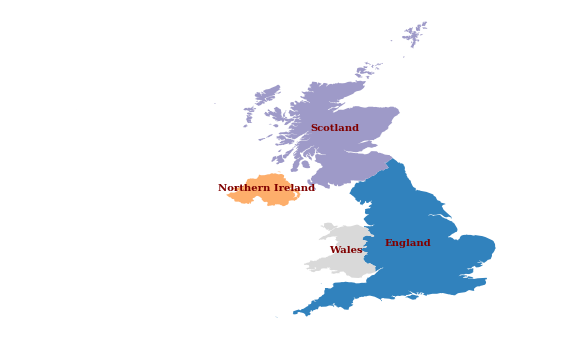

In [405]:
plot_administrative_division(GBR_geonunit, cmap='tab20c', add_text=True)

### Administrative division, level 1 - Italy

In [406]:
ITA_admin_1_data = get_administrative_division_level_1('ITA')
ITA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,latitude,longitude,properties,geometry,area
0,Italy,ITA,IT,1,Verbano-Cusio-Ossola,IT.VB,None,None,None,None,46.085681,8.336083,"{'fips': 'IT12', 'name': 'Verbano-Cusio-Ossola...","POLYGON ((7.84962 45.93971, 7.87020 45.94037, ...",0.264091
1,Italy,ITA,IT,1,Varese,IT.VA,None,None,None,None,45.790795,8.779868,"{'fips': 'IT09', 'name': 'Varese', 'note': 'IT...","POLYGON ((8.72897 46.10824, 8.73216 46.10742, ...",0.129988
2,Italy,ITA,IT,1,Como,IT.CO,None,None,None,None,45.933208,9.150155,"{'fips': 'IT09', 'name': 'Como', 'note': 'ITC'...","POLYGON ((8.90888 45.82829, 8.93959 45.83483, ...",0.150830
3,Italy,ITA,IT,1,Sondrio,IT.SO,None,None,None,None,46.298210,9.914981,"{'fips': 'IT09', 'name': 'Sondrio', 'note': 'I...","POLYGON ((9.22483 46.23119, 9.23972 46.26700, ...",0.378138
4,Italy,ITA,IT,1,Aoste,IT.AO,None,None,None,None,45.730169,7.370982,"{'fips': 'IT19', 'name': 'Aoste', 'note': 'ITC...","POLYGON ((7.02208 45.92526, 7.06694 45.89022, ...",0.381906


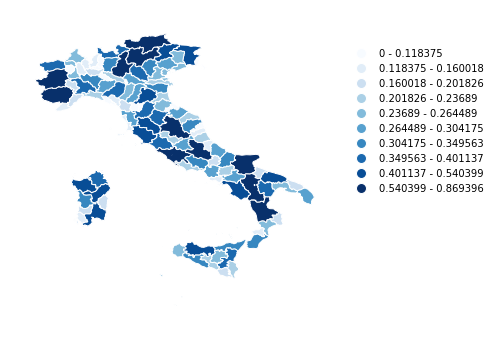

In [407]:
choropleth_administrative_division(ITA_admin_1_data, 'area', add_text=False)

### Administrative division, List of administrative regions - Italy

In [408]:
ITA_regions = ITA_admin_1_data[['country', 'countrycode', 'properties', 'geometry']].reset_index()
ITA_regions['region'] = ITA_regions.properties.apply(lambda x: x['region'])
ITA_regions = ITA_regions.dissolve(by='region', aggfunc='sum')
ITA_regions.head()

,geometry,index
region,,
Abruzzo,"POLYGON ((14.25716 42.44607, 14.28419 42.42829...",171
Apulia,"POLYGON ((18.09893 40.51793, 18.11997 40.50458...",209
Basilicata,"POLYGON ((16.86328 40.39092, 16.78273 40.30158...",80
Calabria,"POLYGON ((16.57349 38.46733, 16.56959 38.42951...",166
Campania,"MULTIPOLYGON (((15.64665 40.04693, 15.63038 40...",305


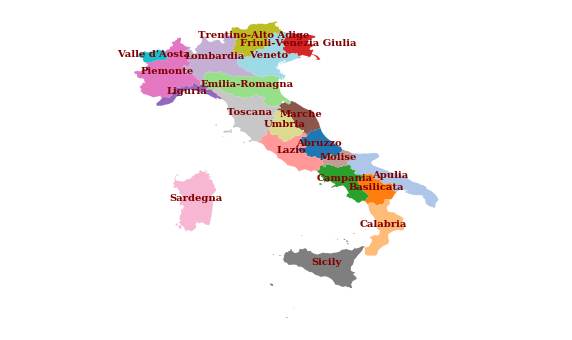

In [409]:
plot_administrative_division(ITA_regions, cmap='tab20', add_text=True)

### Administrative division, level 1 - France

In [410]:
FRA_admin_1_data = get_administrative_division_level_1('FRA')
# Remove overseas regions
FRA_admin_1_data.drop(FRA_admin_1_data[FRA_admin_1_data.adm_area_1.isin(['Guyane française', 'La Réunion', 'Mayotte', 'Martinique', 'Guadeloupe'])].index, inplace=True)

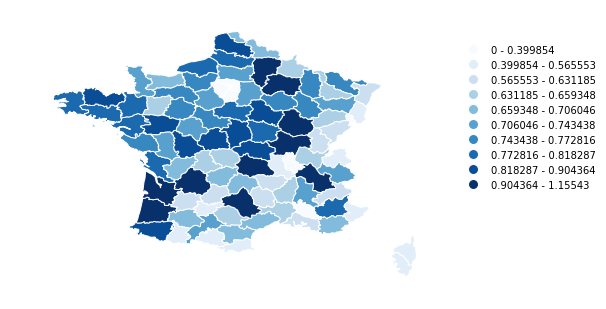

In [412]:
choropleth_administrative_division(FRA_admin_1_data, 'area', add_text=False)

### Administrative division, List of administrative regions - France

In [413]:
FRA_regions = FRA_admin_1_data[['country', 'countrycode', 'properties', 'geometry']].reset_index()
FRA_regions['region'] = FRA_regions.properties.apply(lambda x: x['region'])
FRA_regions = FRA_regions.dissolve(by='region', aggfunc='sum')
FRA_regions.head()

,geometry,index
region,,
Alsace,"POLYGON ((7.58198 48.12135, 7.57895 48.11448, ...",35
Aquitaine,"POLYGON ((-1.74736 43.29100, -1.74973 43.29479...",226
Auvergne,"POLYGON ((3.36973 44.95424, 3.35734 44.95535, ...",322
Basse-Normandie,"POLYGON ((0.41718 48.94612, 0.41283 48.94146, ...",163
Bourgogne,"POLYGON ((5.25063 46.98123, 5.25015 46.98096, ...",376


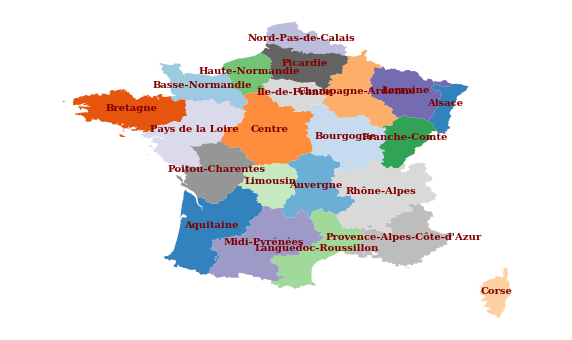

In [414]:
plot_administrative_division(FRA_regions, cmap='tab20c', add_text=True)